In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d jaimetrickz/galaxy-zoo-2-images

Dataset URL: https://www.kaggle.com/datasets/jaimetrickz/galaxy-zoo-2-images
License(s): Attribution 4.0 International (CC BY 4.0)
 99% 3.03G/3.06G [00:22<00:00, 205MB/s]
100% 3.06G/3.06G [00:22<00:00, 144MB/s]


In [ ]:
!unzip galaxy-zoo-2-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: images_gz2/images/95074.jpg  
  inflating: images_gz2/images/95075.jpg  
  inflating: images_gz2/images/95076.jpg  
  inflating: images_gz2/images/95077.jpg  
  inflating: images_gz2/images/95078.jpg  
  inflating: images_gz2/images/95079.jpg  
  inflating: images_gz2/images/9508.jpg  
  inflating: images_gz2/images/95080.jpg  
  inflating: images_gz2/images/95081.jpg  
  inflating: images_gz2/images/95082.jpg  
  inflating: images_gz2/images/95083.jpg  
  inflating: images_gz2/images/95084.jpg  
  inflating: images_gz2/images/95085.jpg  
  inflating: images_gz2/images/95086.jpg  
  inflating: images_gz2/images/95087.jpg  
  inflating: images_gz2/images/95088.jpg  
  inflating: images_gz2/images/95089.jpg  
  inflating: images_gz2/images/9509.jpg  
  inflating: images_gz2/images/95090.jpg  
  inflating: images_gz2/images/95091.jpg  
  inflating: images_gz2/images/95092.jpg  
  inflating: images_gz2/images/95093.jpg  
  inf

In [ ]:
!kaggle datasets download -d jaimetrickz/galaxy-zoo-2-images -f gz2_filename_mapping.csv

Dataset URL: https://www.kaggle.com/datasets/jaimetrickz/galaxy-zoo-2-images
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/2.25M [00:00<?, ?B/s]
100% 2.25M/2.25M [00:00<00:00, 147MB/s]


In [ ]:
# !unzip gz2_filename_mapping.csv.zip

#Collecting Galaxy Zoo 2 Morphology Table:

-As mentioned earlier, the most recent and reliable source for galaxy morphology is from Hart et al. (2016), available at data.galaxyzoo.org. Download the "GZ2 - Table 1 - Normal-depth sample with new debiasing method – CSV".

In [ ]:
!wget https://gz2hart.s3.amazonaws.com/gz2_hart16.csv.gz

--2024-11-03 04:12:56--  https://gz2hart.s3.amazonaws.com/gz2_hart16.csv.gz
Resolving gz2hart.s3.amazonaws.com (gz2hart.s3.amazonaws.com)... 3.5.25.171, 16.15.177.205, 52.216.44.217, ...
Connecting to gz2hart.s3.amazonaws.com (gz2hart.s3.amazonaws.com)|3.5.25.171|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78513011 (75M) [application/x-gzip]
Saving to: ‘gz2_hart16.csv.gz’

gz2_hart16.csv.gz   100%[===================>]  74.88M  43.0MB/s    in 1.7s    

2024-11-03 04:12:58 (43.0 MB/s) - ‘gz2_hart16.csv.gz’ saved [78513011/78513011]



In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
# List files in the current directory
os.listdir()

['.config',
 'kaggle.json',
 'gz2_filename_mapping.csv.zip',
 'images_gz2',
 'gz2_filename_mapping.csv',
 'gz2_hart16.csv.gz',
 'galaxy-zoo-2-images.zip',
 'best_ResNet50_model.pth',
 'sample_data']

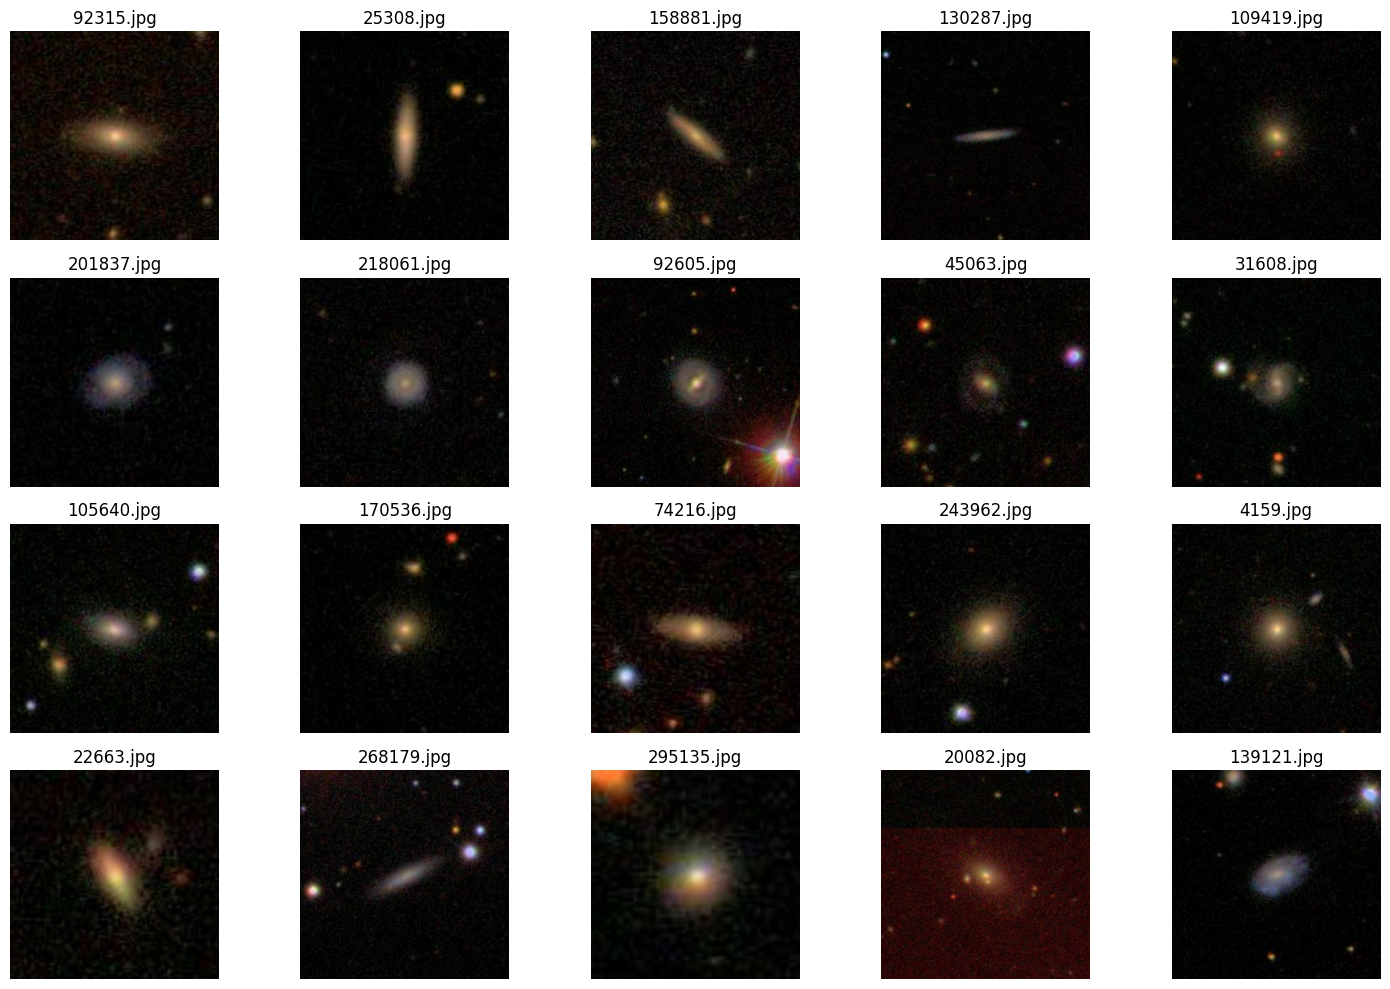

In [ ]:
import random
import matplotlib.image as mpimg

# Path to your images directory
image_dir = 'images_gz2/images'  # Adjust this to your actual path

# List all image files in the directory
# Added error handling for empty image list:
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
if not image_files:
    print(f"Error: No .jpg images found in directory: {image_dir}")
    # You can choose to exit here or handle it differently
    # For example, you could raise an exception or change the directory
    # exit()
else:
    # Randomly select 10 images, but limit it to the number of available images
    num_images_to_select = min(20, len(image_files))
    random_images = random.sample(image_files, num_images_to_select)

    # Set up the plot
    plt.figure(figsize=(15, 10))

    # Display each selected image
    for i, img_file in enumerate(random_images):
        img_path = os.path.join(image_dir, img_file)
        img = mpimg.imread(img_path)

        plt.subplot(4, 5, i + 1)  # Create a grid of 2 rows and 5 columns
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        plt.title(img_file)  # Show filename as title

    plt.tight_layout()
    plt.show()

![link text](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F6067505%2F8ac7df09aa0f85a1a07ac9dc0a81b57f%2FHubble_-_de_Vaucouleurs_Galaxy_Morphology_Diagram.png?generation=1611680439647479&alt=media)

In [ ]:
# prompt: rad this /content/gz2_hart16.csv.gz.1 the same

import pandas as pd

try:
    morphology_data = pd.read_csv('/content/gz2_hart16.csv.gz', compression='gzip')
    morphology_data.head(10)
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except pd.errors.ParserError:
    print("Error: Could not parse the file. Check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [ ]:
morphology_data.shape

(239695, 231)

In [ ]:
morphology_data.head(10)

dr7objid          ra        dec     rastring    decstring  \
0  587732591714893851  179.042984  60.522518  11:56:10.32  +60:31:21.1   
1  588009368545984617  135.084396  52.494240  09:00:20.26  +52:29:39.3   
2  587732484359913515  183.371979  50.741508  12:13:29.27  +50:44:29.4   
3  587741723357282317  186.251953  28.558598  12:25:00.47  +28:33:31.0   
4  587738410866966577  161.086395  14.084465  10:44:20.73  +14:05:04.1   
5  587729751132209314  246.921387  40.926968  16:27:41.13  +40:55:37.1   
6  587733608555216981  249.474640  36.073040  16:37:53.91  +36:04:22.9   
7  587735742617616406  243.146759  29.365067  16:12:35.22  +29:21:54.2   
8  587738574068908121  195.278030  39.841473  13:01:06.73  +39:50:29.3   
9  587731870708596837  183.062057  56.177532  12:12:14.89  +56:10:39.1   

     sample gz2_class  total_classifications  total_votes  \
0  original      Sc+t                     45          342   
1  original      Sb+t                     42          332   
2  original        Ei                     36          125   
3  original      Sc+t                     28          218   
4  original        Er                     43          151   
5     extra        Ei                     48          154   
6  original        Ei                     39          142   
7  original      Sb+t                     35          282   
8  original        Ei                     50          158   
9  original      Sb?t                     43          275   

   t01_smooth_or_features_a01_smooth_count  ...  \
0                                        0  ...   
1                                        1  ...   
2                                       28  ...   
3                                        1  ...   
4                                       33  ...   
5                                       41  ...   
6                                       25  ...   
7                                        0  ...   
8                                       42  ...   
9                                        8  ...   

   t11_arms_number_a36_more_than_4_fraction  \
0                                     0.450   
1                                     0.512   
2                                     0.000   
3                                     0.240   
4                                     0.000   
5                                     0.000   
6                                     0.000   
7                                     0.457   
8                                     0.000   
9                                     0.048   

   t11_arms_number_a36_more_than_4_weighted_fraction  \
0                                              0.450   
1                                              0.503   
2                                              0.000   
3                                              0.240   
4                                              0.000   
5                                              0.000   
6                                              0.000   
7                                              0.442   
8                                              0.000   
9                                              0.048   

   t11_arms_number_a36_more_than_4_debiased  \
0                                  0.482646   
1                                  0.504833   
2                                  0.000000   
3                                  0.241322   
4                                  0.000000   
5                                  0.000000   
6                                  0.000000   
7                                  0.480484   
8                                  0.000000   
9                                  0.049229   

   t11_arms_number_a36_more_than_4_flag  t11_arms_number_a37_cant_tell_count  \
0                                     0                                   16   
1                                     0                                   13   
2                                     0                                

In [ ]:
for i in morphology_data.columns:
  print(i)

dr7objid
ra
dec
rastring
decstring
sample
gz2_class
total_classifications
total_votes
t01_smooth_or_features_a01_smooth_count
t01_smooth_or_features_a01_smooth_weight
t01_smooth_or_features_a01_smooth_fraction
t01_smooth_or_features_a01_smooth_weighted_fraction
t01_smooth_or_features_a01_smooth_debiased
t01_smooth_or_features_a01_smooth_flag
t01_smooth_or_features_a02_features_or_disk_count
t01_smooth_or_features_a02_features_or_disk_weight
t01_smooth_or_features_a02_features_or_disk_fraction
t01_smooth_or_features_a02_features_or_disk_weighted_fraction
t01_smooth_or_features_a02_features_or_disk_debiased
t01_smooth_or_features_a02_features_or_disk_flag
t01_smooth_or_features_a03_star_or_artifact_count
t01_smooth_or_features_a03_star_or_artifact_weight
t01_smooth_or_features_a03_star_or_artifact_fraction
t01_smooth_or_features_a03_star_or_artifact_weighted_fraction
t01_smooth_or_features_a03_star_or_artifact_debiased
t01_smooth_or_features_a03_star_or_artifact_flag
t02_edgeon_a04_yes_c

In [ ]:
metadata = pd.read_csv('/content/gz2_filename_mapping.csv')


In [ ]:
metadata.head(10)

objid    sample  asset_id
0  587722981736120347  original         1
1  587722981736579107  original         2
2  587722981741363294  original         3
3  587722981741363323  original         4
4  587722981741559888  original         5
5  587722981741625481  original         6
6  587722981741625484  original         7
7  587722981741625520  original         8
8  587722981741625545  original         9
9  587722981741691055  original        10

In [ ]:

images=os.listdir(image_dir)
image_count = len(images)
print(f"Total number of images in {image_dir}: {image_count}")

Total number of images in images_gz2/images: 243437


In [ ]:
sample_unique = metadata["sample"].nunique()
print(f"Total number of unique samples: {sample_unique}")
metadata["sample"].value_counts()

Total number of unique samples: 5


sample
original            245609
stripe82_coadd_1     30346
stripe82_coadd_2     30339
extra                28174
stripe82             21522
Name: count, dtype: int64

In [ ]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355990 entries, 0 to 355989
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   objid     355990 non-null  int64 
 1   sample    355990 non-null  object
 2   asset_id  355990 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.1+ MB


In [ ]:
metadata.describe().T # Not very much useful here

count          mean           std           min           25%  \
objid     355990.0  1.961733e+18  3.030788e+18  5.877230e+17  5.877334e+17   
asset_id  355990.0  1.779955e+05  1.027656e+05  1.000000e+00  8.899825e+04   

                   50%           75%           max  
objid     5.877399e+17  5.880177e+17  8.647475e+18  
asset_id  1.779955e+05  2.669928e+05  3.559900e+05

In [ ]:
# Check for missing values
print(metadata.isnull().sum())
print("-" * 20)

# Explore data types and unique values for each column
for col in metadata.columns:
    print(f"Column: {col}")
    print(f"Data type: {metadata[col].dtype}")
    print(f"Number of unique values: {metadata[col].nunique()}")
    print(f"Unique values: {metadata[col].unique()[:10]}") # Show first 10 unique values
    print("-" * 20)

objid       0
sample      0
asset_id    0
dtype: int64
--------------------
Column: objid
Data type: int64
Number of unique values: 325651
Unique values: [587722981736120347 587722981736579107 587722981741363294
 587722981741363323 587722981741559888 587722981741625481
 587722981741625484 587722981741625520 587722981741625545
 587722981741691055]
--------------------
Column: sample
Data type: object
Number of unique values: 5
Unique values: ['original' 'extra' 'stripe82' 'stripe82_coadd_1' 'stripe82_coadd_2']
--------------------
Column: asset_id
Data type: int64
Number of unique values: 355990
Unique values: [ 1  2  3  4  5  6  7  8  9 10]
--------------------


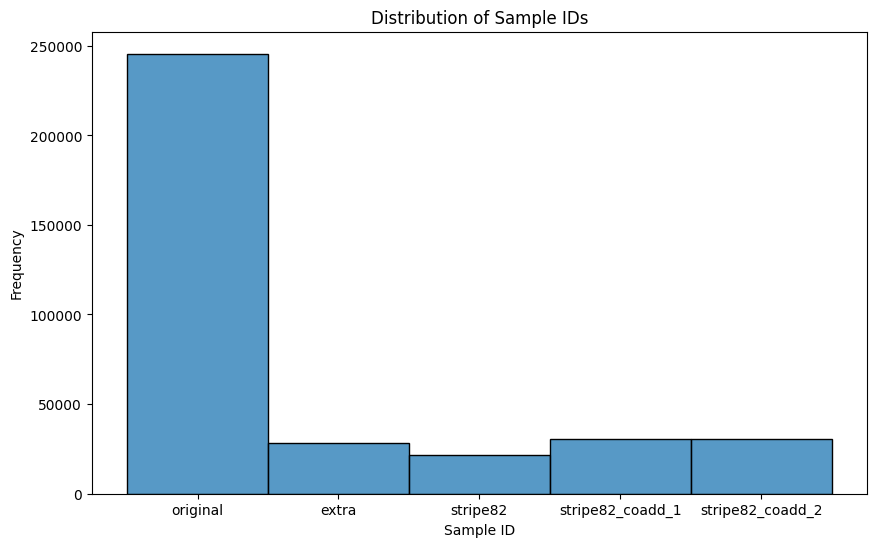

In [ ]:
# Analyze the distribution of 'sample' values (if it represents galaxy IDs or something similar)
plt.figure(figsize=(10, 6))
sns.histplot(metadata['sample'], bins=30) # Adjust the number of bins as needed
plt.title('Distribution of Sample IDs')
plt.xlabel('Sample ID')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# If 'object_id' is a unique identifier for each galaxy, examine its distribution
if 'object_id' in metadata.columns:
  plt.figure(figsize=(10, 6))
  sns.histplot(metadata['object_id'], bins=30)
  plt.title('Distribution of Object IDs')
  plt.xlabel('Object ID')
  plt.ylabel('Frequency')
  plt.show()


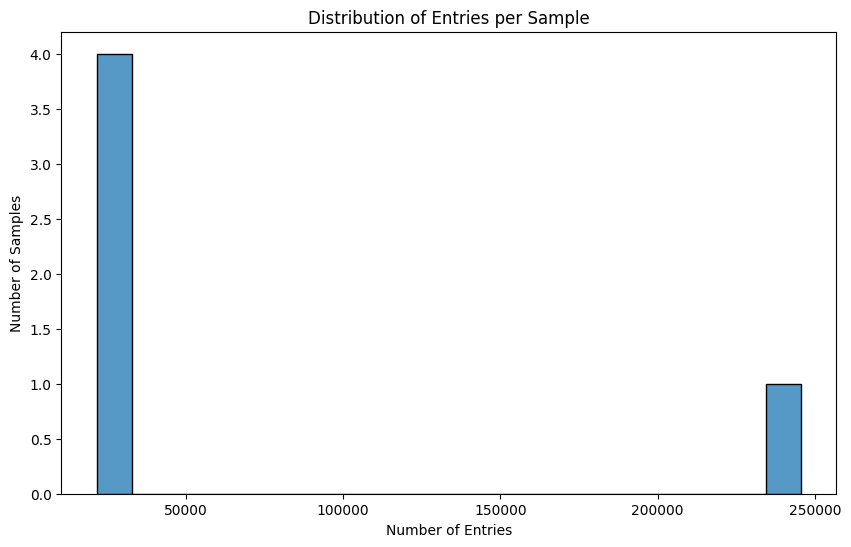

count         5.000000
mean      71198.000000
std       97565.760206
min       21522.000000
25%       28174.000000
50%       30339.000000
75%       30346.000000
max      245609.000000
Name: sample, dtype: float64


In [ ]:
# Example: Count the number of entries per sample
entries_per_sample = metadata.groupby('sample')['sample'].count() # Count occurrences of 'sample' values

plt.figure(figsize=(10, 6))
sns.histplot(entries_per_sample, bins=20)
plt.title('Distribution of Entries per Sample') # Changed title
plt.xlabel('Number of Entries') # Changed x-axis label
plt.ylabel('Number of Samples')
plt.show()

print(entries_per_sample.describe())


In [ ]:
metadata["objid"].value_counts()

objid
8647474693020319805    2
8647474693020319806    2
8647474693020319847    2
8647474693020319890    2
8647474693020320107    2
                      ..
587738067811696787     1
587738067811696777     1
587738067811696759     1
587738067811565671     1
587738067812745490     1
Name: count, Length: 325651, dtype: int64

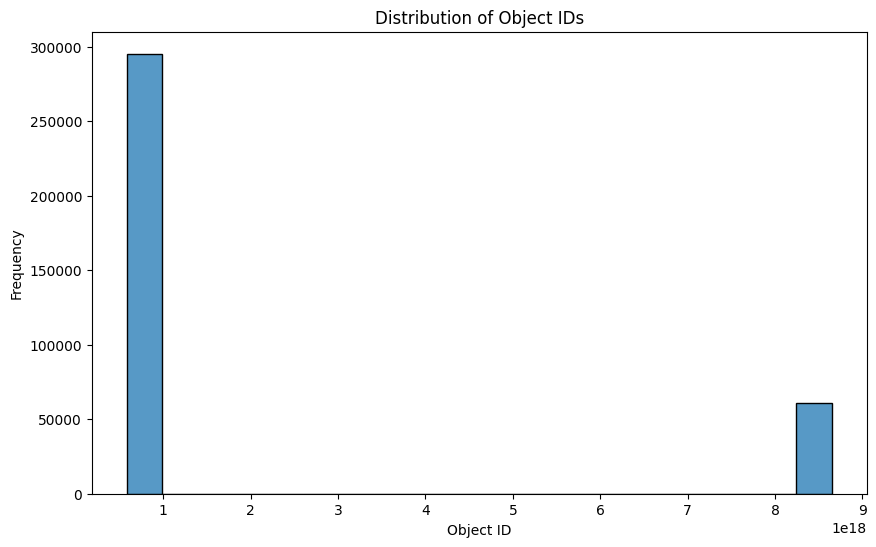

In [ ]:
# Assuming 'objid' is a column in your 'file_map' DataFrame

plt.figure(figsize=(10, 6))
sns.histplot(metadata['objid'], bins=20)  # Adjust the number of bins as needed
plt.title('Distribution of Object IDs')
plt.xlabel('Object ID')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# prompt: replace name of objid column

# Rename the 'dr7objid' column to 'objid' in the morphology_data DataFrame
morphology_data = morphology_data.rename(columns={'dr7objid': 'objid'})
morphology_data



objid          ra        dec     rastring    decstring  \
0       587732591714893851  179.042984  60.522518  11:56:10.32  +60:31:21.1   
1       588009368545984617  135.084396  52.494240  09:00:20.26  +52:29:39.3   
2       587732484359913515  183.371979  50.741508  12:13:29.27  +50:44:29.4   
3       587741723357282317  186.251953  28.558598  12:25:00.47  +28:33:31.0   
4       587738410866966577  161.086395  14.084465  10:44:20.73  +14:05:04.1   
...                    ...         ...        ...          ...          ...   
239690  587741490371625059  167.542648  28.991867  11:10:10.23  +28:59:30.7   
239691  587731174917669027  316.108826   1.214799  21:04:26.12  +01:12:53.3   
239692  587731512070177108   21.690212  -0.546427  01:26:45.65  +00:32:47.1   
239693  587731513145688256   25.747143   0.360079  01:42:59.31  +00:21:36.3   
239694  588015507679805636   48.130630  -1.112244  03:12:31.35  -01:06:44.1   

          sample gz2_class  total_classifications  total_votes  \
0       original      Sc+t                     45          342   
1       original      Sb+t                     42          332   
2       original        Ei                     36          125   
3       original      Sc+t                     28          218   
4       original        Er                     43          151   
...          ...       ...                    ...          ...   
239690     extra        Ec                     42          135   
239691  stripe82     Ei(i)                     46          186   
239692  stripe82        Ei                     48          164   
239693  stripe82     Ei(i)                     48          204   
239694  stripe82        Ec                     49          170   

        t01_smooth_or_features_a01_smooth_count  ...  \
0                                             0  ...   
1                                             1  ...   
2                                            28  ...   
3                                             1  ...   
4                                            33  ...   
...                                         ...  ...   
239690                                       34  ...   
239691                                       25  ...   
239692                                       36  ...   
239693                                       25  ...   
239694                                       36  ...   

        t11_arms_number_a36_more_than_4_fraction  \
0                                          0.450   
1                                          0.512   
2                                          0.000   
3                                          0.240   
4                                          0.000   
...                                          ...   
239690                                     0.000   
239691                                     0.000   
239692                                     0.000   
239693                                     0.000   
239694                                     0.000   

        t11_arms_number_a36_more_than_4_weighted_fraction  \
0                                                   0.450   
1                                                   0.503   
2                                                   0.000   
3                                                   0.240   
4                                                   0.000   
...                                                   ...   
239690                                              0.000   
239691                                              0.000   
239692                                              0.000   
239693                                              0.000   
239694                                              0.000   

        t11_arms_number_a36_more_than_4_debiased  \
0                                       0.482646   
1                                       0.504833   
2                                       0.000000   
3                                       

In [ ]:
# Merge the two datasets on 'objid'
merged_data = pd.merge(metadata, morphology_data, on='objid', how='inner')

# Check the merged data
merged_data.head()


objid  sample_x  asset_id          ra       dec     rastring  \
0  587722981741363294  original         3  182.925262 -1.092357  12:11:42.06   
1  587722981741363323  original         4  182.970108 -1.219537  12:11:52.83   
2  587722981741559888  original         5  183.438095 -1.238414  12:13:45.14   
3  587722981741625481  original         6  183.473999 -1.231429  12:13:53.76   
4  587722981741625484  original         7  183.477783 -1.084604  12:13:54.67   

     decstring  sample_y gz2_class  total_classifications  ...  \
0  -01:05:32.5  original        Sb                     52  ...   
1  -01:13:10.3  original      Sc?l                     30  ...   
2  -01:14:18.3  original        Er                     53  ...   
3  -01:13:53.1  original      Sc1t                     37  ...   
4  -01:05:04.6  original        Sb                     45  ...   

   t11_arms_number_a36_more_than_4_fraction  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   t11_arms_number_a36_more_than_4_weighted_fraction  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   t11_arms_number_a36_more_than_4_debiased  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   t11_arms_number_a36_more_than_4_flag  t11_arms_number_a37_cant_tell_count  \
0                                     0                                    0   
1                                     0                                    1   
2                                     0                                    0   
3                                     0                                    0   
4                                     0                                    0   

   t11_arms_number_a37_cant_tell_weight  \
0                                   0.0   
1                                   1.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   t11_arms_number_a37_cant_tell_fraction  \
0                                     0.0   
1                                     1.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   t11_arms_number_a37_cant_tell_weighted_fraction  \
0                                              0.0   
1                                              1.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   t11_arms_number_a37_cant_tell_debiased  t11_arms_number_a37_cant_tell_flag  
0                                     0.0                                   0  
1                                     1.0                                   1  
2                                     0.0                                   0  
3                                     0.0                                   0  
4                                     0.0                                   0  

[5 rows x 233 columns]

In [ ]:
for i in merged_data.columns:
  print(i)

objid
sample_x
asset_id
ra
dec
rastring
decstring
sample_y
gz2_class
total_classifications
total_votes
t01_smooth_or_features_a01_smooth_count
t01_smooth_or_features_a01_smooth_weight
t01_smooth_or_features_a01_smooth_fraction
t01_smooth_or_features_a01_smooth_weighted_fraction
t01_smooth_or_features_a01_smooth_debiased
t01_smooth_or_features_a01_smooth_flag
t01_smooth_or_features_a02_features_or_disk_count
t01_smooth_or_features_a02_features_or_disk_weight
t01_smooth_or_features_a02_features_or_disk_fraction
t01_smooth_or_features_a02_features_or_disk_weighted_fraction
t01_smooth_or_features_a02_features_or_disk_debiased
t01_smooth_or_features_a02_features_or_disk_flag
t01_smooth_or_features_a03_star_or_artifact_count
t01_smooth_or_features_a03_star_or_artifact_weight
t01_smooth_or_features_a03_star_or_artifact_fraction
t01_smooth_or_features_a03_star_or_artifact_weighted_fraction
t01_smooth_or_features_a03_star_or_artifact_debiased
t01_smooth_or_features_a03_star_or_artifact_flag
t02

In [ ]:
relevant_columns = [
    'objid','sample_x', 'asset_id',
    't01_smooth_or_features_a01_smooth_debiased', 't01_smooth_or_features_a02_features_or_disk_debiased',
    't02_edgeon_a04_yes_debiased', 't02_edgeon_a05_no_debiased',
    't03_bar_a06_bar_debiased', 't03_bar_a07_no_bar_debiased',
    't04_spiral_a08_spiral_debiased', 't04_spiral_a09_no_spiral_debiased',
    't05_bulge_prominence_a10_no_bulge_debiased', 't05_bulge_prominence_a12_obvious_debiased'
]


In [ ]:
# Filter the relevant columns for classification
filtered_data = merged_data[relevant_columns]

In [ ]:
filtered_data.sample(10)

objid  sample_x  asset_id  \
233356  587731186735186207  stripe82    279221   
11496   587726013996204113  original     14557   
14413   587726032236576951  original     17869   
16645   587726100415250643  original     20464   
23745   587728949589377044  original     28793   
97088   587738946659221777  original    114944   
139211  587742013819322503  original    163757   
96031   587738615947264075  original    113791   
155129  587742774549872809  original    181541   
117015  587739719215939656  original    137149   

        t01_smooth_or_features_a01_smooth_debiased  \
233356                                       0.326   
11496                                        0.406   
14413                                        0.000   
16645                                        0.489   
23745                                        0.449   
97088                                        0.317   
139211                                       0.795   
96031                                        0.073   
155129                                       0.856   
117015                                       0.000   

        t01_smooth_or_features_a02_features_or_disk_debiased  \
233356                                              0.454      
11496                                               0.584      
14413                                               0.983      
16645                                               0.491      
23745                                               0.429      
97088                                               0.640      
139211                                              0.607      
96031                                               0.288      
155129                                              0.279      
117015                                              0.999      

        t02_edgeon_a04_yes_debiased  t02_edgeon_a05_no_debiased  \
233356                     0.678011                    0.346222   
11496                      0.075160                    0.905961   
14413                      0.000368                    0.976373   
16645                      0.000000                    1.000000   
23745                      0.000000                    1.000000   
97088                      0.785714                    0.393868   
139211                     0.000000                    1.000000   
96031                      0.000000                    1.000000   
155129                     0.000000                    1.000000   
117015                     0.000000                    1.000000   

        t03_bar_a06_bar_debiased  t03_bar_a07_no_bar_debiased  \
233356                  0.180467                     0.817287   
11496                   0.000000                     1.000000   
14413                   0.997735                     0.000003   
16645                   0.270144                     0.734946   
23745                   0.048000                     0.952000   
97088                   0.000000                     1.000000   
139211                  0.000000                     1.000000   
96031                   0.000000                     1.000000   
155129                  0.000000                     1.000000   
117015                  0.329719                     0.563897   

        t04_spiral_a08_spiral_debiased  t04_spiral_a09_no_spiral_debiased  \
233356                        0.188529                       8.119340e-01   
11496                         0.587674                       4.418407e-01   
14413                         0.999331                       3.792046e-07   
16645                         0.556141                       4.704372e-01   
23745                         0.000000                       1.000000e+00   
97088                         0.223879                       6.477816e-01   
139211                        0.000000                       1.000000e+00   
96031                         0.999967                       6.384302e-25   
155129                 

In [ ]:
filtered_data.shape

(239695, 13)

In [ ]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239695 entries, 0 to 239694
Data columns (total 13 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   objid                                                 239695 non-null  int64  
 1   sample_x                                              239695 non-null  object 
 2   asset_id                                              239695 non-null  int64  
 3   t01_smooth_or_features_a01_smooth_debiased            239695 non-null  float64
 4   t01_smooth_or_features_a02_features_or_disk_debiased  239695 non-null  float64
 5   t02_edgeon_a04_yes_debiased                           239695 non-null  float64
 6   t02_edgeon_a05_no_debiased                            239401 non-null  float64
 7   t03_bar_a06_bar_debiased                              239695 non-null  float64
 8   t03_bar_a07_no_bar_debiased                 

In [ ]:
filtered_data.describe().T

count          mean  \
objid                                               239695.0  5.878182e+17   
asset_id                                            239695.0  1.418400e+05   
t01_smooth_or_features_a01_smooth_debiased          239695.0  3.979425e-01   
t01_smooth_or_features_a02_features_or_disk_deb...  239695.0  5.924470e-01   
t02_edgeon_a04_yes_debiased                         239695.0  1.381704e-01   
t02_edgeon_a05_no_debiased                          239401.0  8.517421e-01   
t03_bar_a06_bar_debiased                            239695.0  2.539545e-01   
t03_bar_a07_no_bar_debiased                         239415.0  6.712325e-01   
t04_spiral_a08_spiral_debiased                      239695.0  4.980884e-01   
t04_spiral_a09_no_spiral_debiased                   239407.0  4.444128e-01   
t05_bulge_prominence_a10_no_bulge_debiased          239695.0  7.061659e-02   
t05_bulge_prominence_a12_obvious_debiased           239695.0  3.967528e-01   

                                                             std  \
objid                                               1.827461e+14   
asset_id                                            8.152236e+04   
t01_smooth_or_features_a01_smooth_debiased          3.464840e-01   
t01_smooth_or_features_a02_features_or_disk_deb...  3.620481e-01   
t02_edgeon_a04_yes_debiased                         2.798277e-01   
t02_edgeon_a05_no_debiased                          2.757892e-01   
t03_bar_a06_bar_debiased                            3.327718e-01   
t03_bar_a07_no_bar_debiased                         3.848734e-01   
t04_spiral_a08_spiral_debiased                      4.559295e-01   
t04_spiral_a09_no_spiral_debiased                   4.584062e-01   
t05_bulge_prominence_a10_no_bulge_debiased          1.826212e-01   
t05_bulge_prominence_a12_obvious_debiased           3.027643e-01   

                                                             min  \
objid                                               5.877230e+17   
asset_id                                            3.000000e+00   
t01_smooth_or_features_a01_smooth_debiased          0.000000e+00   
t01_smooth_or_features_a02_features_or_disk_deb...  0.000000e+00   
t02_edgeon_a04_yes_debiased                         0.000000e+00   
t02_edgeon_a05_no_debiased                          0.000000e+00   
t03_bar_a06_bar_debiased                            0.000000e+00   
t03_bar_a07_no_bar_debiased                         0.000000e+00   
t04_spiral_a08_spiral_debiased                      0.000000e+00   
t04_spiral_a09_no_spiral_debiased                   0.000000e+00   
t05_bulge_prominence_a10_no_bulge_debiased          0.000000e+00   
t05_bulge_prominence_a12_obvious_debiased           0.000000e+00   

                                                             25%  \
objid                                               5.877327e+17   
asset_id                                            7.161950e+04   
t01_smooth_or_features_a01_smooth_debiased          4.000000e-02   
t01_smooth_or_features_a02_features_or_disk_deb...  1.810000e-01   
t02_edgeon_a04_yes_debiased                         0.000000e+00   
t02_edgeon_a05_no_debiased                          8.584243e-01   
t03_bar_a06_bar_debiased                            0.000000e+00   
t03_bar_a07_no_bar_debiased                         3.187328e-01   
t04_spiral_a08_spiral_debiased                      0.000000e+00   
t04_spiral_a09_no_spiral_debiased                   2.058668e-06   
t05_bulge_prominence_a10_no_bulge_debiased          0.000000e+00   
t05_bulge_prominence_a12_obvious_debiased           1.030000e-01   

                                                             50%  \
objid                                               5.877393e+17   
asset_id                                            1.402870e+05   
t01_smooth_or_features_a01_smooth_debiased          3.260000e-01   
t01_smooth_or_features_a02_features_or_disk_deb...  6.920000e-01   
t02_edgeon_a04_yes_debiased                  

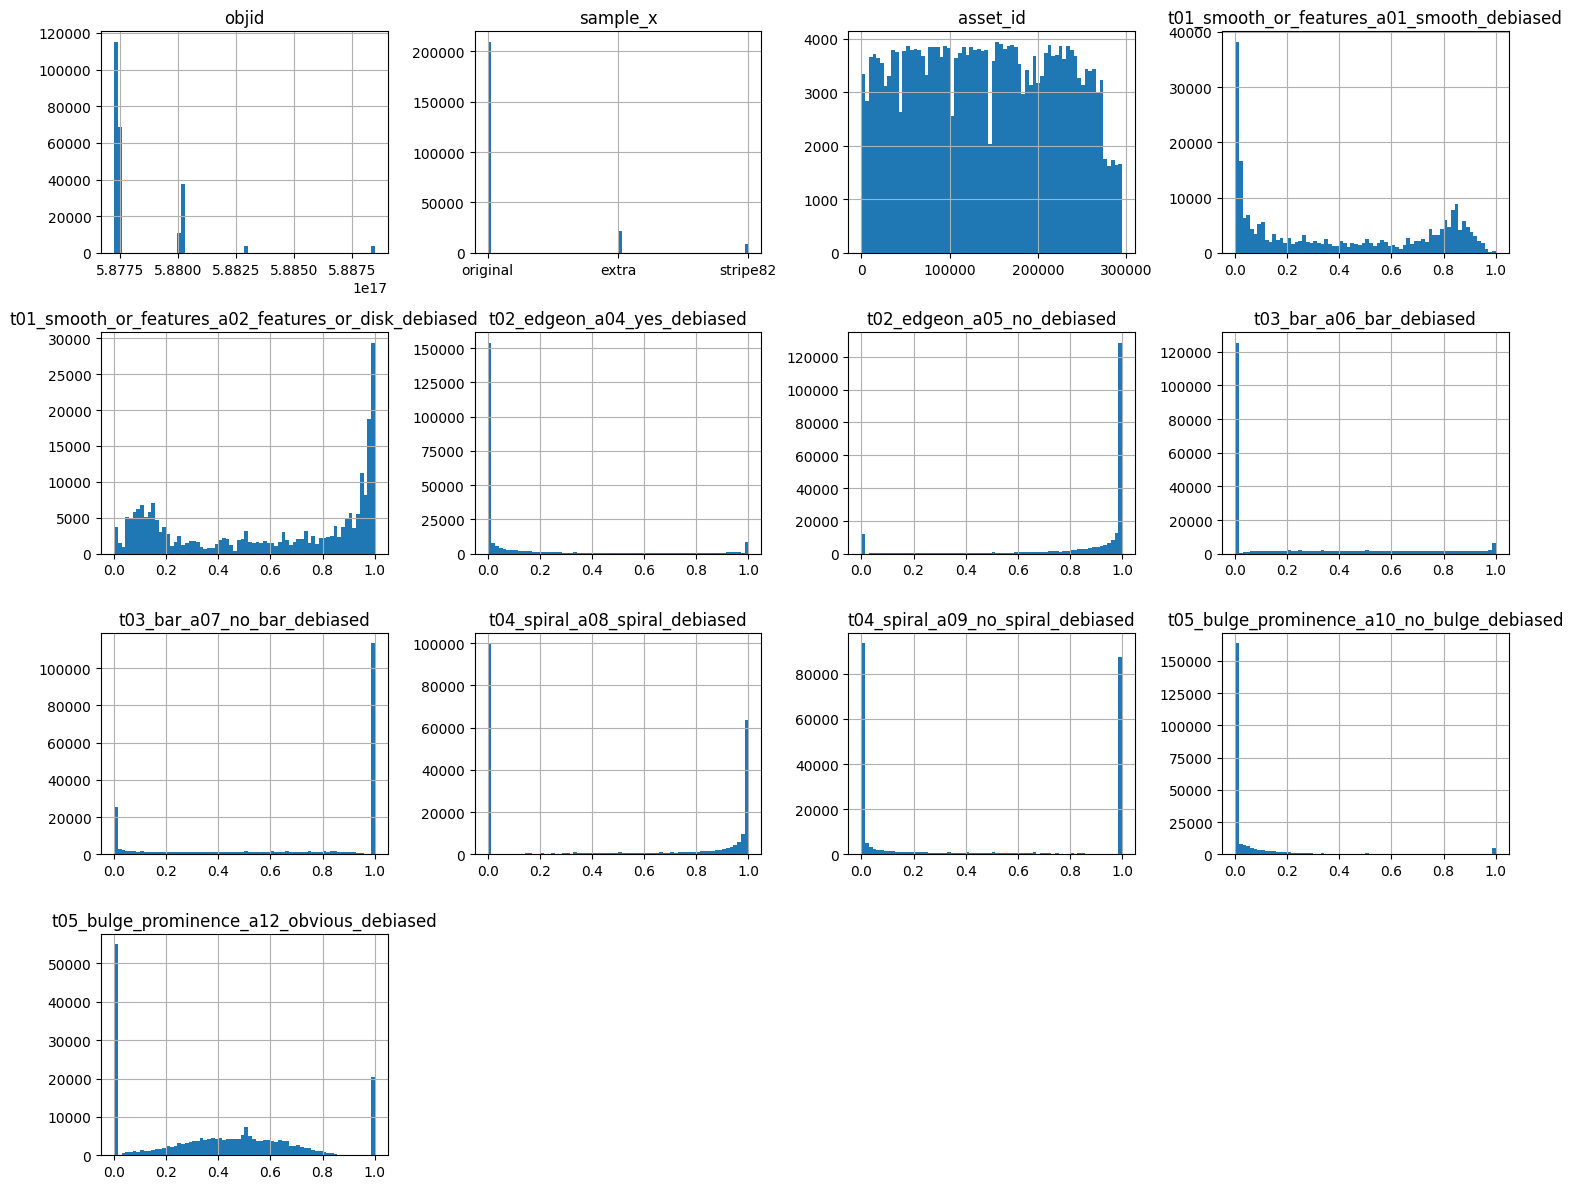

In [ ]:
num_cols = 4  # Number of columns in the subplot grid
num_rows = (len(relevant_columns) + num_cols - 1) // num_cols # Calculate the number of rows

plt.figure(figsize=(15, 3 * num_rows)) # Adjust figure size based on the number of rows

for i, col in enumerate(relevant_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    merged_data[col].hist(bins=70)
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
original_sample = merged_data[merged_data['sample_x'] == 'original']
extra_sample = merged_data[merged_data['sample_x'] == 'extra']

original_sample.shape, extra_sample.shape

((209294, 233), (21844, 233))

In [ ]:
smooth_galaxies = merged_data[merged_data['t01_smooth_or_features_a01_smooth_debiased'] > 0.5]
disk_galaxies = merged_data[merged_data['t01_smooth_or_features_a02_features_or_disk_debiased'] > 0.5]

smooth_galaxies.shape, disk_galaxies.shape



((97575, 233), (141678, 233))

In [ ]:
spiral_galaxies = merged_data[merged_data['t04_spiral_a08_spiral_debiased'] > 0.5]
non_spiral_galaxies = merged_data[merged_data['t04_spiral_a09_no_spiral_debiased'] > 0.5]

spiral_galaxies.shape, non_spiral_galaxies.shape


((123740, 233), (102917, 233))

In [ ]:
edge_on_galaxies = merged_data[merged_data['t02_edgeon_a04_yes_debiased'] > 0.5]
non_edge_on_galaxies = merged_data[merged_data['t02_edgeon_a05_no_debiased'] > 0.5]

edge_on_galaxies.shape, non_edge_on_galaxies.shape

((28952, 233), (210806, 233))

In [ ]:
barred_galaxies = merged_data[merged_data['t03_bar_a06_bar_debiased'] > 0.5]
non_barred_galaxies = merged_data[merged_data['t03_bar_a07_no_bar_debiased'] > 0.5]

barred_galaxies.shape, non_barred_galaxies.shape

((59551, 233), (160883, 233))

In [ ]:
no_bulge_galaxies = merged_data[merged_data['t05_bulge_prominence_a10_no_bulge_debiased'] > 0.5]
obvious_bulge_galaxies = merged_data[merged_data['t05_bulge_prominence_a12_obvious_debiased'] > 0.5]

no_bulge_galaxies.shape, obvious_bulge_galaxies.shape

((9335, 233), (89710, 233))

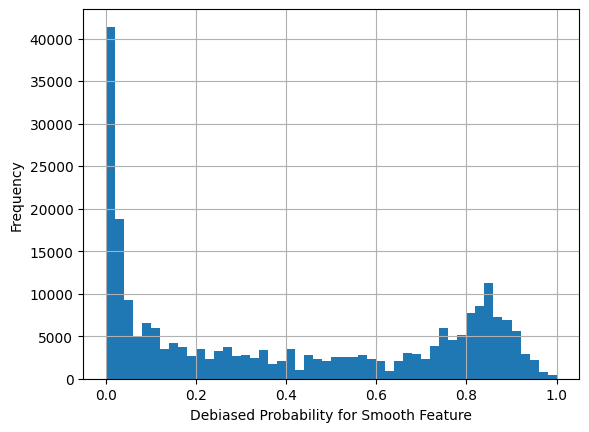

In [ ]:
import matplotlib.pyplot as plt
merged_data['t01_smooth_or_features_a01_smooth_debiased'].hist(bins=50)
plt.xlabel('Debiased Probability for Smooth Feature')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Define a threshold for classification
threshold = 0.75

# Create new columns based on thresholds
merged_data['classification'] = merged_data.apply(lambda row:
    'Smooth' if row['t01_smooth_or_features_a01_smooth_debiased'] > threshold else
    'Disk-Feature' if row['t01_smooth_or_features_a02_features_or_disk_debiased'] > threshold else
    'Edge-on' if row['t02_edgeon_a04_yes_debiased'] > threshold else
    'Bar' if row['t03_bar_a06_bar_debiased'] > threshold else
    'Spiral' if row['t04_spiral_a08_spiral_debiased'] > threshold else
    'Unknown', axis=1)




In [ ]:
# Inspect resulting classifications
merged_data[['objid', 'classification', 'asset_id']].sample(10)

objid classification  asset_id
127085  587741490373263440        Unknown    150600
213716  587732152568053882        Edge-on    251733
140838  587742015431639161         Smooth    165536
18621   587728307491176516         Smooth     22911
195750  588017991227998344   Disk-Feature    230419
169054  588011101032480944   Disk-Feature    199475
45474   587732483820552391   Disk-Feature     55401
54185   587733081884459150   Disk-Feature     65087
113423  587739610251002017   Disk-Feature    133126
190026  588017947209039919   Disk-Feature    224035

In [ ]:
merged_data['classification'].value_counts()

classification
Disk-Feature    107591
Smooth           66798
Unknown          38674
Spiral           14822
Edge-on           7288
Bar               4522
Name: count, dtype: int64

In [ ]:
unknown_galaxies = merged_data[merged_data['classification'] == 'Unknown']
unknown_galaxies.shape

(38674, 234)

In [ ]:
unknown_galaxies.sample(10)

objid  sample_x  asset_id          ra        dec  \
120386  587739811022766197  original    140900  211.429855  25.231363   
215964  587735042535981094     extra    254592  124.057091  25.076075   
46635   587732577239761072  original     56707  168.513657   6.369195   
22066   587728917910126720  original     26865  212.525467  61.566963   
84999   587736914605047982  original     99920  220.132568  11.387922   
200547  588023047483687057  original    235787  152.111893  24.089401   
96150   587738615954407476  original    113924  176.945007  36.437664   
239125  588015509826306196  stripe82    293865   45.851707   0.434119   
160341  587745539435200799  original    188230  129.705231   9.652670   
7226    587725551733113028  original      9651  121.522476  47.461613   

           rastring    decstring  sample_y gz2_class  total_classifications  \
120386  14:05:43.17  +25:13:52.9  original     Sb(r)                     40   
215964  08:16:13.70  +25:04:33.9     extra     Sd(i)                     31   
46635   11:14:03.28  +06:22:09.1  original        Er                     45   
22066   14:10:06.11  +61:34:01.1  original        Sd                     46   
84999   14:40:31.82  +11:23:16.5  original        Er                     43   
200547  10:08:26.85  +24:05:21.8  original     Sc(r)                     42   
96150   11:47:46.80  +36:26:15.6  original     Sb(r)                     31   
239125  03:03:24.41  +00:26:02.8  stripe82        Ei                     41   
160341  08:38:49.26  +09:39:09.6  original        Er                     53   
7226    08:06:05.39  +47:27:41.8  original     Sc(m)                     47   

        ...  t11_arms_number_a36_more_than_4_weighted_fraction  \
120386  ...                                                0.0   
215964  ...                                                0.0   
46635   ...                                                0.0   
22066   ...                                                0.0   
84999   ...                                                0.0   
200547  ...                                                0.0   
96150   ...                                                0.0   
239125  ...                                                0.0   
160341  ...                                                0.0   
7226    ...                                                0.0   

        t11_arms_number_a36_more_than_4_debiased  \
120386                                       0.0   
215964                                       0.0   
46635                                        0.0   
22066                                        0.0   
84999                                        0.0   
200547                                       0.0   
96150                                        0.0   
239125                                       0.0   
160341                                       0.0   
7226                                         0.0   

        t11_arms_number_a36_more_than_4_flag  \
120386                                     0   
215964                                     0   
46635                                      0   
22066                                      0   
84999                                      0   
200547                                     0   
96150                                      0   
239125                                     0   
160341                                     0   
7226                                       0   

        t11_arms_number_a37_cant_tell_count  \
120386                                    7   
215964                                    3   
46635                                     0   
22066                                     0   
84999                                     1   
200547                                    0   
96150                                     4   
239125                                    1   
160341                                    0   
7226                                      0   



In [ ]:
unknown_galaxies[relevant_columns].describe().T

count          mean  \
objid                                               38674.0  5.878171e+17   
asset_id                                            38674.0  1.415286e+05   
t01_smooth_or_features_a01_smooth_debiased          38674.0  4.824772e-01   
t01_smooth_or_features_a02_features_or_disk_deb...  38674.0  3.991426e-01   
t02_edgeon_a04_yes_debiased                         38674.0  1.109709e-01   
t02_edgeon_a05_no_debiased                          38565.0  8.904494e-01   
t03_bar_a06_bar_debiased                            38674.0  1.241972e-01   
t03_bar_a07_no_bar_debiased                         38565.0  8.626108e-01   
t04_spiral_a08_spiral_debiased                      38674.0  1.826572e-01   
t04_spiral_a09_no_spiral_debiased                   38566.0  8.043004e-01   
t05_bulge_prominence_a10_no_bulge_debiased          38674.0  1.251907e-01   
t05_bulge_prominence_a12_obvious_debiased           38674.0  3.961068e-01   

                                                             std  \
objid                                               1.804304e+14   
asset_id                                            8.156703e+04   
t01_smooth_or_features_a01_smooth_debiased          1.911030e-01   
t01_smooth_or_features_a02_features_or_disk_deb...  2.038061e-01   
t02_edgeon_a04_yes_debiased                         1.903387e-01   
t02_edgeon_a05_no_debiased                          1.805860e-01   
t03_bar_a06_bar_debiased                            2.048797e-01   
t03_bar_a07_no_bar_debiased                         2.293210e-01   
t04_spiral_a08_spiral_debiased                      2.514079e-01   
t04_spiral_a09_no_spiral_debiased                   2.691689e-01   
t05_bulge_prominence_a10_no_bulge_debiased          2.400168e-01   
t05_bulge_prominence_a12_obvious_debiased           3.103339e-01   

                                                             min  \
objid                                               5.877230e+17   
asset_id                                            3.000000e+00   
t01_smooth_or_features_a01_smooth_debiased          0.000000e+00   
t01_smooth_or_features_a02_features_or_disk_deb...  0.000000e+00   
t02_edgeon_a04_yes_debiased                         0.000000e+00   
t02_edgeon_a05_no_debiased                          0.000000e+00   
t03_bar_a06_bar_debiased                            0.000000e+00   
t03_bar_a07_no_bar_debiased                         0.000000e+00   
t04_spiral_a08_spiral_debiased                      0.000000e+00   
t04_spiral_a09_no_spiral_debiased                   0.000000e+00   
t05_bulge_prominence_a10_no_bulge_debiased          0.000000e+00   
t05_bulge_prominence_a12_obvious_debiased           0.000000e+00   

                                                             25%  \
objid                                               5.877327e+17   
asset_id                                            7.140800e+04   
t01_smooth_or_features_a01_smooth_debiased          3.440000e-01   
t01_smooth_or_features_a02_features_or_disk_deb...  2.120000e-01   
t02_edgeon_a04_yes_debiased                         0.000000e+00   
t02_edgeon_a05_no_debiased                          8.500000e-01   
t03_bar_a06_bar_debiased                            0.000000e+00   
t03_bar_a07_no_bar_debiased                         7.783491e-01   
t04_spiral_a08_spiral_debiased                      0.000000e+00   
t04_spiral_a09_no_spiral_debiased                   5.942731e-01   
t05_bulge_prominence_a10_no_bulge_debiased          0.000000e+00   
t05_bulge_prominence_a12_obvious_debiased           5.300000e-02   

                                                             50%  \
objid                                               5.877393e+17   
asset_id                                            1.389880e+05   
t01_smooth_or_features_a01_smooth_debiased          5.000000e-01   
t01_smooth_or_features_a02_features_or_disk_deb...  4.150000e-01   
t02_edgeon_a04_yes_debiased                         0.000

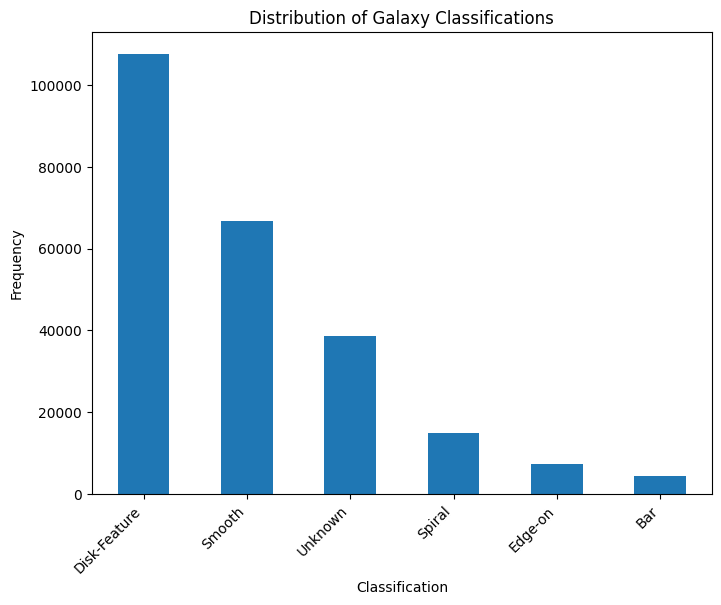

In [ ]:
# Visualize the distribution of the 'Unknown' classification
plt.figure(figsize=(8, 6))
merged_data['classification'].value_counts().plot(kind='bar')
plt.title('Distribution of Galaxy Classifications')
plt.xlabel('Classification')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()

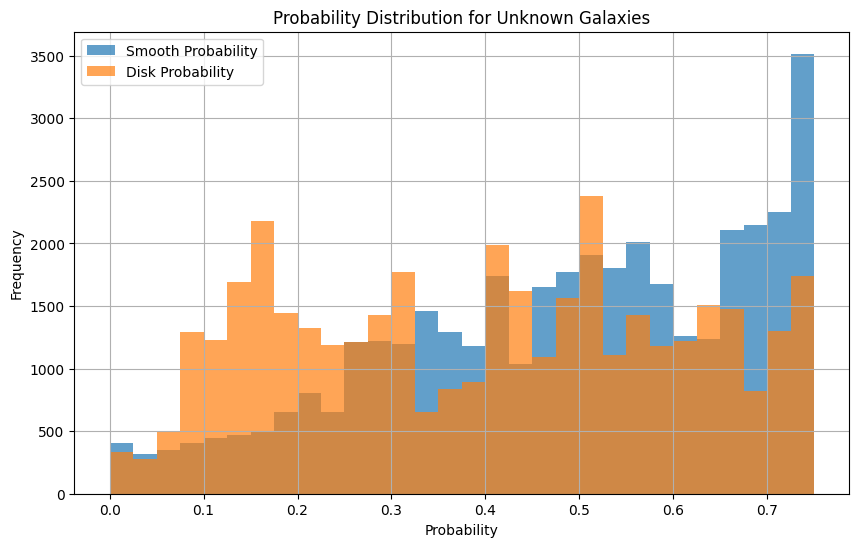

In [ ]:
#Further analysis of 'Unknown' galaxies
unknown_galaxies = merged_data[merged_data['classification'] == 'Unknown']

# Example:  Look at the distribution of probabilities for unknown galaxies for a specific feature
plt.figure(figsize=(10, 6))
unknown_galaxies['t01_smooth_or_features_a01_smooth_debiased'].hist(bins=30, alpha=0.7, label='Smooth Probability')
unknown_galaxies['t01_smooth_or_features_a02_features_or_disk_debiased'].hist(bins=30, alpha=0.7, label='Disk Probability')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Probability Distribution for Unknown Galaxies')
plt.legend()
plt.show()

In [ ]:
id_n_cl = merged_data[['asset_id','classification']]
id_n_cl.head(10)

asset_id classification
0         3        Unknown
1         4         Spiral
2         5         Smooth
3         6        Unknown
4         7        Unknown
5         8         Smooth
6         9         Smooth
7        11   Disk-Feature
8        12        Unknown
9        13         Spiral

In [ ]:


# Paths to images and where to store organized folders
image_dir = '/content/images_gz2/images'  # Your image directory
output_dir = '/content/output/train/'  # Directory to store organized folders

# Create class folders if they do not exist
classes = id_n_cl['classification'].unique()
for cls in classes:
    os.makedirs(os.path.join(output_dir, cls), exist_ok=True)

# Move images to their respective class folders
for index, row in id_n_cl.iterrows():
    asset_id = row['asset_id']
    classification = row['classification']
    image_name = f"{asset_id}.jpg"  # Assuming images are named by asset_id
    source = os.path.join(image_dir, image_name)
    destination = os.path.join(output_dir, classification, image_name)

    # Move the file if it exists
    if os.path.exists(source):
        shutil.move(source, destination)
    else:
        print(f"Image {image_name} not found.")


Image 374.jpg not found.
Image 7349.jpg not found.
Image 7350.jpg not found.
Image 7351.jpg not found.
Image 10959.jpg not found.
Image 15246.jpg not found.
Image 15247.jpg not found.
Image 26603.jpg not found.
Image 26606.jpg not found.
Image 27513.jpg not found.
Image 27514.jpg not found.
Image 30336.jpg not found.
Image 33876.jpg not found.
Image 33877.jpg not found.
Image 33878.jpg not found.
Image 40057.jpg not found.
Image 50643.jpg not found.
Image 59269.jpg not found.
Image 59270.jpg not found.
Image 59271.jpg not found.
Image 81483.jpg not found.
Image 89792.jpg not found.
Image 92317.jpg not found.
Image 95667.jpg not found.
Image 99869.jpg not found.
Image 99870.jpg not found.
Image 102663.jpg not found.
Image 102665.jpg not found.
Image 191283.jpg not found.
Image 198040.jpg not found.
Image 198041.jpg not found.
Image 198345.jpg not found.
Image 198346.jpg not found.
Image 198347.jpg not found.
Image 198348.jpg not found.
Image 198349.jpg not found.
Image 198350.jpg not fo

In [ ]:
train_dir = '/content/output/train/'

# Dictionary to store counts
class_counts = {}

# Iterate through subdirectories (classes) in the train directory
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    # Check if it is a directory
    if os.path.isdir(class_path):
        # Count the number of image files in the class directory
        image_count = sum(1 for filename in os.listdir(class_path) if filename.endswith(('.jpg', '.jpeg', '.png'))) # Add more extensions as needed
        class_counts[class_name] = image_count
        print(f"Class: {class_name}, Number of images: {image_count}")

# Print total counts if needed
#print("\nTotal image counts per class:")
#for class_name, count in class_counts.items():
#    print(f"{class_name}: {count}")

Class: Smooth, Number of images: 66784
Class: Disk-Feature, Number of images: 107563
Class: Unknown, Number of images: 38612
Class: Spiral, Number of images: 14817
Class: Bar, Number of images: 4518
Class: Edge-on, Number of images: 7279


In [ ]:
# Print total counts if needed
print("\nTotal image counts per class:")
for class_name, count in class_counts.items():
   print(f"{class_name}: {count}")


Total image counts per class:
Smooth: 66784
Disk-Feature: 107563
Unknown: 38612
Spiral: 14817
Bar: 4518
Edge-on: 7279


In [ ]:
# prompt: delete output folder

# import shutil

# shutil.rmtree('/content/output', ignore_errors=True)

In [ ]:

from collections import defaultdict

def balance_classes(source_dir, destination_dir, max_per_class):
    """Balances image classes by taking a maximum number of images from each class."""

    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)

    class_counts = defaultdict(int)
    for class_name in os.listdir(source_dir):
        class_path = os.path.join(source_dir, class_name)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                if class_counts[class_name] < max_per_class:
                    source_image_path = os.path.join(class_path, image_name)
                    destination_class_path = os.path.join(destination_dir, class_name)
                    if not os.path.exists(destination_class_path):
                        os.makedirs(destination_class_path)

                    destination_image_path = os.path.join(destination_class_path, image_name)
                    shutil.copy2(source_image_path, destination_image_path) # copy2 preserves metadata
                    class_counts[class_name] += 1


# Example usage (assuming your balanced data will go into model_data)
max_per_class=4500

source_directory = '/content/output/train'  # Replace with the actual path
destination_directory = '/content/model_data'

balance_classes(source_directory, destination_directory, max_per_class)

In [ ]:
import os
import shutil
import random

def split_data(source_dir, train_dir, test_dir, val_dir, train_ratio=0.7, test_ratio=0.15, val_ratio=0.15):
    """Splits data into train, test, and validation sets."""

    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)
    if not os.path.exists(val_dir):
        os.makedirs(val_dir)

    for class_name in os.listdir(source_dir):
        class_path = os.path.join(source_dir, class_name)
        if os.path.isdir(class_path):
            images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
            random.shuffle(images)
            num_images = len(images)

            num_train = int(train_ratio * num_images)
            num_test = int(test_ratio * num_images)
            num_val = int(val_ratio * num_images)

            train_images = images[:num_train]
            test_images = images[num_train:num_train + num_test]
            val_images = images[num_train + num_test:num_train + num_test + num_val]


            for image in train_images:
                source = os.path.join(class_path, image)
                destination = os.path.join(train_dir, class_name, image)
                os.makedirs(os.path.dirname(destination), exist_ok=True)
                shutil.copy2(source, destination)  # Copy file (preserves metadata)

            for image in test_images:
                source = os.path.join(class_path, image)
                destination = os.path.join(test_dir, class_name, image)
                os.makedirs(os.path.dirname(destination), exist_ok=True)
                shutil.copy2(source, destination)

            for image in val_images:
                source = os.path.join(class_path, image)
                destination = os.path.join(val_dir, class_name, image)
                os.makedirs(os.path.dirname(destination), exist_ok=True)
                shutil.copy2(source, destination)


# Example usage
source_directory = '/content/model_data'
train_directory = '/content/galaxy_data/train'
test_directory = '/content/galaxy_data/test'
validation_directory = '/content/galaxy_data/validation'


split_data(source_directory, train_directory, test_directory, validation_directory)

In [ ]:
%pip install torch==2.0.0 torchvision==0.15.0

INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install torch==2.0.0 and torchvision==0.15.0 because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested torch==2.0.0
    torchvision 0.15.0 depends on torch==2.0.0+cu117

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip to attempt to solve the dependency conflict

ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [ ]:
%pip install torchsummary

In [ ]:
import torch
import torchvision
print(torch.__version__)
print(torchvision.__version__)

2.5.0+cu121
0.20.0+cu121


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

train_transforms = transforms.Compose([
    transforms.CenterCrop(160),                     # Crop center region of images
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.CenterCrop(160),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
test_transforms = transforms.Compose([
    transforms.CenterCrop(160),    # or use transforms.Resize((224, 224)) based on input size
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Use the same mean and std as training
])



# Define datasets
train_dataset = datasets.ImageFolder(root=train_directory, transform=train_transforms)
val_dataset = datasets.ImageFolder(root=validation_directory, transform=val_transforms)
test_dataset = datasets.ImageFolder(root=test_directory, transform=test_transforms)

# Create DataLoader for training
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Access the class-to-index mapping
class_to_idx_train = train_dataset.class_to_idx
class_to_idx_val = val_dataset.class_to_idx
class_to_idx_test = test_dataset.class_to_idx

print(class_to_idx_train)  # {'Bar': 0, 'Disk_Feature': 1, 'Edge_on': 2, 'Smooth': 3, 'Spiral': 4, 'Unknown': 5}


{'Bar': 0, 'Disk-Feature': 1, 'Edge-on': 2, 'Smooth': 3, 'Spiral': 4, 'Unknown': 5}


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torchvision import models, transforms
import torch.optim as optim

class EnhancedCustomResNet50(nn.Module):
    def __init__(self, num_classes):
        super(EnhancedCustomResNet50, self).__init__()

        # Load pretrained ResNet50 model
        self.base_model = models.resnet50(pretrained=True)

        # Freeze all layers except the last residual block (layer4) and fully connected layers
        for param in self.base_model.parameters():
            param.requires_grad = False

        # Unfreeze the last two blocks for fine-tuning
        for param in self.base_model.layer4.parameters():
            param.requires_grad = True

        # Modify the fully connected layer with dropout and batch normalization for regularization
        self.base_model.fc = nn.Sequential(
            nn.Linear(self.base_model.fc.in_features, 1024),   # Input size from ResNet50
            nn.BatchNorm1d(1024),                              # BatchNorm for regularization
            nn.ReLU(),
            nn.Dropout(0.5),                                   # Dropout for additional regularization
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.3),                                   # Additional dropout layer
            nn.Linear(512, num_classes)                        # Final layer for classification
        )

    def forward(self, x):
        x = self.base_model(x)
        return x

# Instantiate model with the number of classes
num_classes = len(train_dataset.classes)  # Adjust based on your dataset
model = EnhancedCustomResNet50(num_classes=num_classes)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 122MB/s]


In [ ]:
num_classes, model

(6,
 EnhancedCustomResNet50(
   (base_model): ResNet(
     (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
     (layer1): Sequential(
       (0): Bottleneck(
         (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
         (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
         (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
         (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         (relu): ReLU(inplace=True)
       

In [ ]:
from torchsummary import summary

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Print the model summary (assuming input size of 224x224 with 3 channels for RGB images)
summary(model, input_size=(3, 224, 224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
# Optimizer setup with differential learning rates
optimizer = optim.Adam([
    {'params': model.base_model.layer4.parameters(), 'lr': 1e-5},  # Fine-tuning last layers at lower learning rate
    {'params': model.base_model.fc.parameters(), 'lr': 1e-4}       # Higher learning rate for new layers
])

# Learning rate scheduler to dynamically reduce the learning rate if no improvement
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# Focal Loss for imbalanced classes (replace CrossEntropyLoss if class imbalance is an issue)
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        p_t = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - p_t) ** self.gamma * ce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

criterion = FocalLoss()  # Use focal loss here

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [ ]:
from tqdm import tqdm  # Import tqdm for progress bars

# Training function
def train_one_epoch(model, train_loader, criterion, optimizer, device):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    progress_bar = tqdm(train_loader, desc="Training", leave=False)  # Progress bar for training

    for images, labels in progress_bar:
        # Move data to the GPU (if available)
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Zero the gradients before the backward pass
        optimizer.zero_grad()

        # Backward pass: Compute gradients
        loss.backward()

        # Update the weights
        optimizer.step()

        # Accumulate the loss
        running_loss += loss.item()

        # Update the progress bar
        progress_bar.set_postfix({"loss": loss.item()})

    # Return the average loss for the epoch
    avg_loss = running_loss / len(train_loader)
    return avg_loss

In [ ]:
# Validation function
def validate(model, val_loader, criterion, scheduler, device):
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    val_correct = 0
    progress_bar = tqdm(val_loader, desc="Validating", leave=False)  # Progress bar for validation

    with torch.no_grad():
        for images, labels in progress_bar:
            # Move data to the GPU (if available)
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)

            # Calculate the loss
            # Corrected: Use criterion instead of scheduler
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Get predictions and calculate accuracy
            _, preds = torch.max(outputs, 1)
            val_correct += torch.sum(preds == labels.data)

            # Update the progress bar
            progress_bar.set_postfix({"val_loss": loss.item()})

    # Calculate average loss and accuracy
    avg_val_loss = val_loss / len(val_loader)
    val_acc = val_correct.double() / len(val_loader.dataset)

    # Adjust the learning rate based on validation loss
    scheduler.step(avg_val_loss) # Corrected: Use average validation loss instead of total loss

    return avg_val_loss, val_acc

In [ ]:
# Initialize lists to store losses
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Train the model
def train_model(model, train_loader, val_loader, criterion, scheduler, optimizer, device, num_epochs):
    best_val_acc = 0.0  # Track best validation accuracy

    for epoch in range(num_epochs):
        print(f'Epoch [{epoch+1}/{num_epochs}]')

        # Train for one epoch
        train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
        train_losses.append(train_loss) # Append train loss for the epoch
        print(f'Train Loss: {train_loss:.4f}')

        # Validate after each epoch
        # Corrected: Pass criterion and device in the correct order
        val_loss, val_acc = validate(model, val_loader, criterion, scheduler, device)
        val_losses.append(val_loss) # Append validation loss for the epoch
        val_accuracies.append(val_acc) # Append validation accuracy for the epoch
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

        # Save the best model based on validation accuracy
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 'best_ResNet50_model.pth')
            print('Model saved.')

In [ ]:
PATH = "/content/best_ResNet50_model.pth"
model.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [ ]:
# Training settings
num_epochs = 20
batch_size = 64

# Create DataLoaders for training, validation, and testing
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Move the model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Train the model
# The scheduler argument was missing and device was incorrectly placed
train_model(model, train_loader, val_loader, criterion, scheduler, optimizer, device, num_epochs)

Epoch [1/20]


Train Loss: 0.7357


Validation Loss: 0.7150, Validation Accuracy: 0.5185
Model saved.
Epoch [2/20]


Train Loss: 0.7201


Validation Loss: 0.7173, Validation Accuracy: 0.5220
Model saved.
Epoch [3/20]


Train Loss: 0.7014


Validation Loss: 0.7282, Validation Accuracy: 0.5138
Epoch [4/20]


Train Loss: 0.6945


Validation Loss: 0.7180, Validation Accuracy: 0.5205
Epoch [5/20]


Train Loss: 0.6842


Validation Loss: 0.7260, Validation Accuracy: 0.5158
Epoch [6/20]


Train Loss: 0.6676


Validation Loss: 0.7197, Validation Accuracy: 0.5205
Epoch [7/20]


Train Loss: 0.6575


Validation Loss: 0.7207, Validation Accuracy: 0.5163
Epoch [8/20]


Train Loss: 0.6551


Validation Loss: 0.7306, Validation Accuracy: 0.5116
Epoch [9/20]


Train Loss: 0.6483


Validation Loss: 0.7281, Validation Accuracy: 0.5210
Epoch [10/20]


Train Loss: 0.6398


Validation Loss: 0.7238, Validation Accuracy: 0.5158
Epoch [11/20]


Train Loss: 0.6343


Validation Loss: 0.7271, Validation Accuracy: 0.5133
Epoch [12/20]


Train Loss: 0.6295


Validation Loss: 0.7335, Validation Accuracy: 0.5126
Epoch [13/20]


Train Loss: 0.6282


Validation Loss: 0.7303, Validation Accuracy: 0.5165
Epoch [14/20]


Train Loss: 0.6122


Validation Loss: 0.7304, Validation Accuracy: 0.5109
Epoch [15/20]


Train Loss: 0.6163


Validation Loss: 0.7294, Validation Accuracy: 0.5141
Epoch [16/20]


Train Loss: 0.6190


Validation Loss: 0.7293, Validation Accuracy: 0.5158
Epoch [17/20]


Train Loss: 0.6096


Validation Loss: 0.7320, Validation Accuracy: 0.5121
Epoch [18/20]


Train Loss: 0.6132


Validation Loss: 0.7318, Validation Accuracy: 0.5133
Epoch [19/20]


Train Loss: 0.6147


Validation Loss: 0.7390, Validation Accuracy: 0.5116
Epoch [20/20]


Train Loss: 0.6124


Validation Loss: 0.7424, Validation Accuracy: 0.5094


In [ ]:

# Testing function
def test_model(model, test_loader, criterion, device):
    model.eval()  # Set the model to evaluation mode
    test_loss = 0.0
    test_correct = 0
    progress_bar = tqdm(test_loader, desc="Testing", leave=False)  # Progress bar for testing

    with torch.no_grad():
        for images, labels in progress_bar:
            # Move data to the GPU (if available)
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)

            # Calculate the loss
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            # Get predictions and calculate accuracy
            _, preds = torch.max(outputs, 1)
            test_correct += torch.sum(preds == labels.data)

            # Update the progress bar
            progress_bar.set_postfix({"test_loss": loss.item()})

    # Calculate average loss and accuracy
    avg_test_loss = test_loss / len(test_loader)
    test_acc = test_correct.double() / len(test_loader.dataset)

    print(f'Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

# After training is done, test the model
test_model(model, test_loader, criterion, device)


Test Loss: 0.7383, Test Accuracy: 0.5210


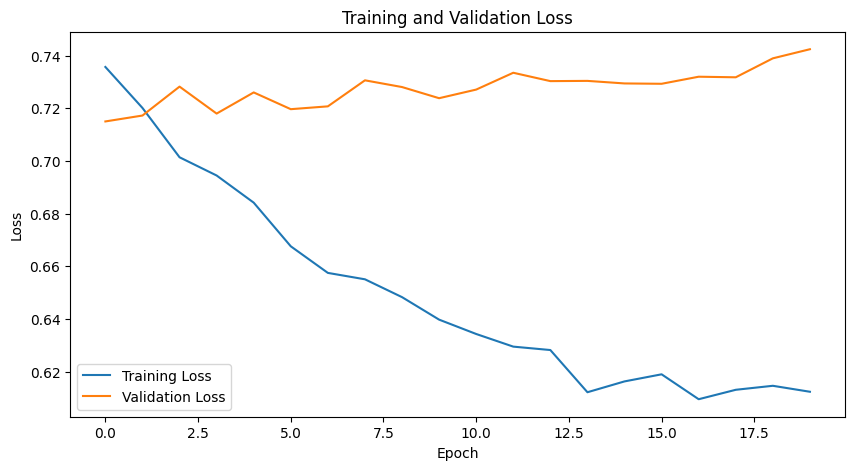

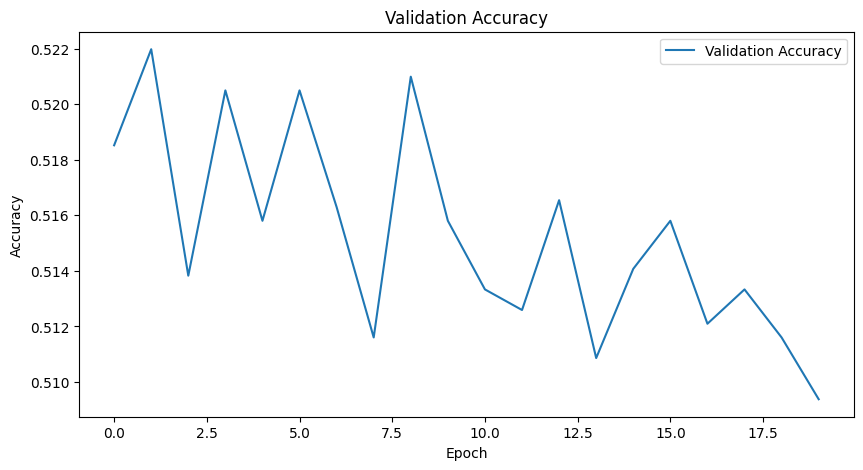

In [ ]:

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy (if available)
plt.figure(figsize=(10, 5))
# Convert val_accuracies to a NumPy array on the CPU
val_accuracies_cpu = [acc.cpu().numpy() for acc in val_accuracies]
plt.plot(val_accuracies_cpu, label='Validation Accuracy') # Plot using the CPU array
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.show()

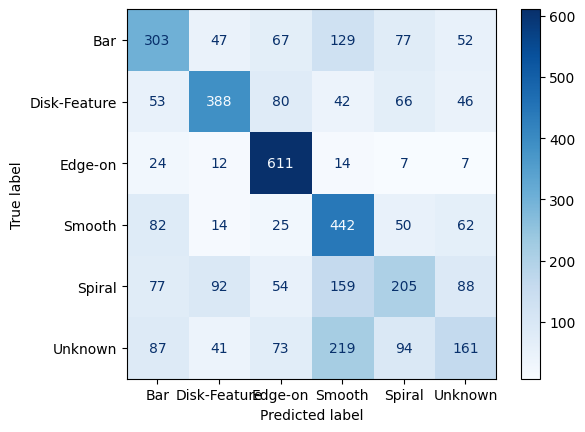

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.45      0.47       675
           1       0.65      0.57      0.61       675
           2       0.67      0.91      0.77       675
           3       0.44      0.65      0.53       675
           4       0.41      0.30      0.35       675
           5       0.39      0.24      0.30       675

    accuracy                           0.52      4050
   macro avg       0.51      0.52      0.50      4050
weighted avg       0.51      0.52      0.50      4050



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def plot_confusion_matrix(model, test_loader, class_to_idx, device):
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            # Move data to the GPU (if available)
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    classes = list(class_to_idx.keys())
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    cr = classification_report(all_labels, all_preds)

    # Plot confusion matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
    print("Classification Report:\n", cr)

# Plot confusion matrix
plot_confusion_matrix(model, test_loader, class_to_idx_test, device)


In [ ]:
import random
import matplotlib.pyplot as plt
from collections import defaultdict

def predict_on_random_images(model, test_loader, class_to_idx, device, num_images, rows, cols, figsize):
    model.eval()
    idx_to_class = {v: k for k, v in class_to_idx.items()}

    # Group images by class
    class_images = defaultdict(list)

    with torch.no_grad():
        for images, labels in test_loader:
            for j in range(len(images)):
                class_name = idx_to_class[labels[j].item()]
                class_images[class_name].append((images[j], labels[j]))

    # Ensure we select images randomly from all available classes
    images_to_show = []
    true_labels = []
    predicted_labels = []

    for class_name in class_images:
        # Randomly sample images for each class (at most num_images)
        selected_samples = random.sample(class_images[class_name], min(len(class_images[class_name]), num_images // len(class_images)))

        for image, label in selected_samples:
            images_to_show.append(image)
            true_labels.append(class_name)

            # Move the data to the GPU (if available) and add batch dimension
            image = image.unsqueeze(0).to(device)

            # Get model predictions
            outputs = model(image)  # Pass the single image with batch dimension
            _, preds = torch.max(outputs, 1)

            # Collect predicted labels
            predicted_labels.append(idx_to_class[preds.item()])

            if len(images_to_show) >= num_images:
                break

    # Set up the figure for plotting
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    # Plot the images with true and predicted labels
    for i, ax in enumerate(axes):
        if i < len(images_to_show):
            image = images_to_show[i].permute(1, 2, 0).cpu().numpy()  # Convert to numpy for plotting
            image = (image - image.min()) / (image.max() - image.min())  # Normalize to 0-1
            ax.imshow(image)
            ax.set_title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
            ax.axis("off")
        else:
            ax.axis("off")  # Hide any extra subplots

    plt.tight_layout()
    plt.show()


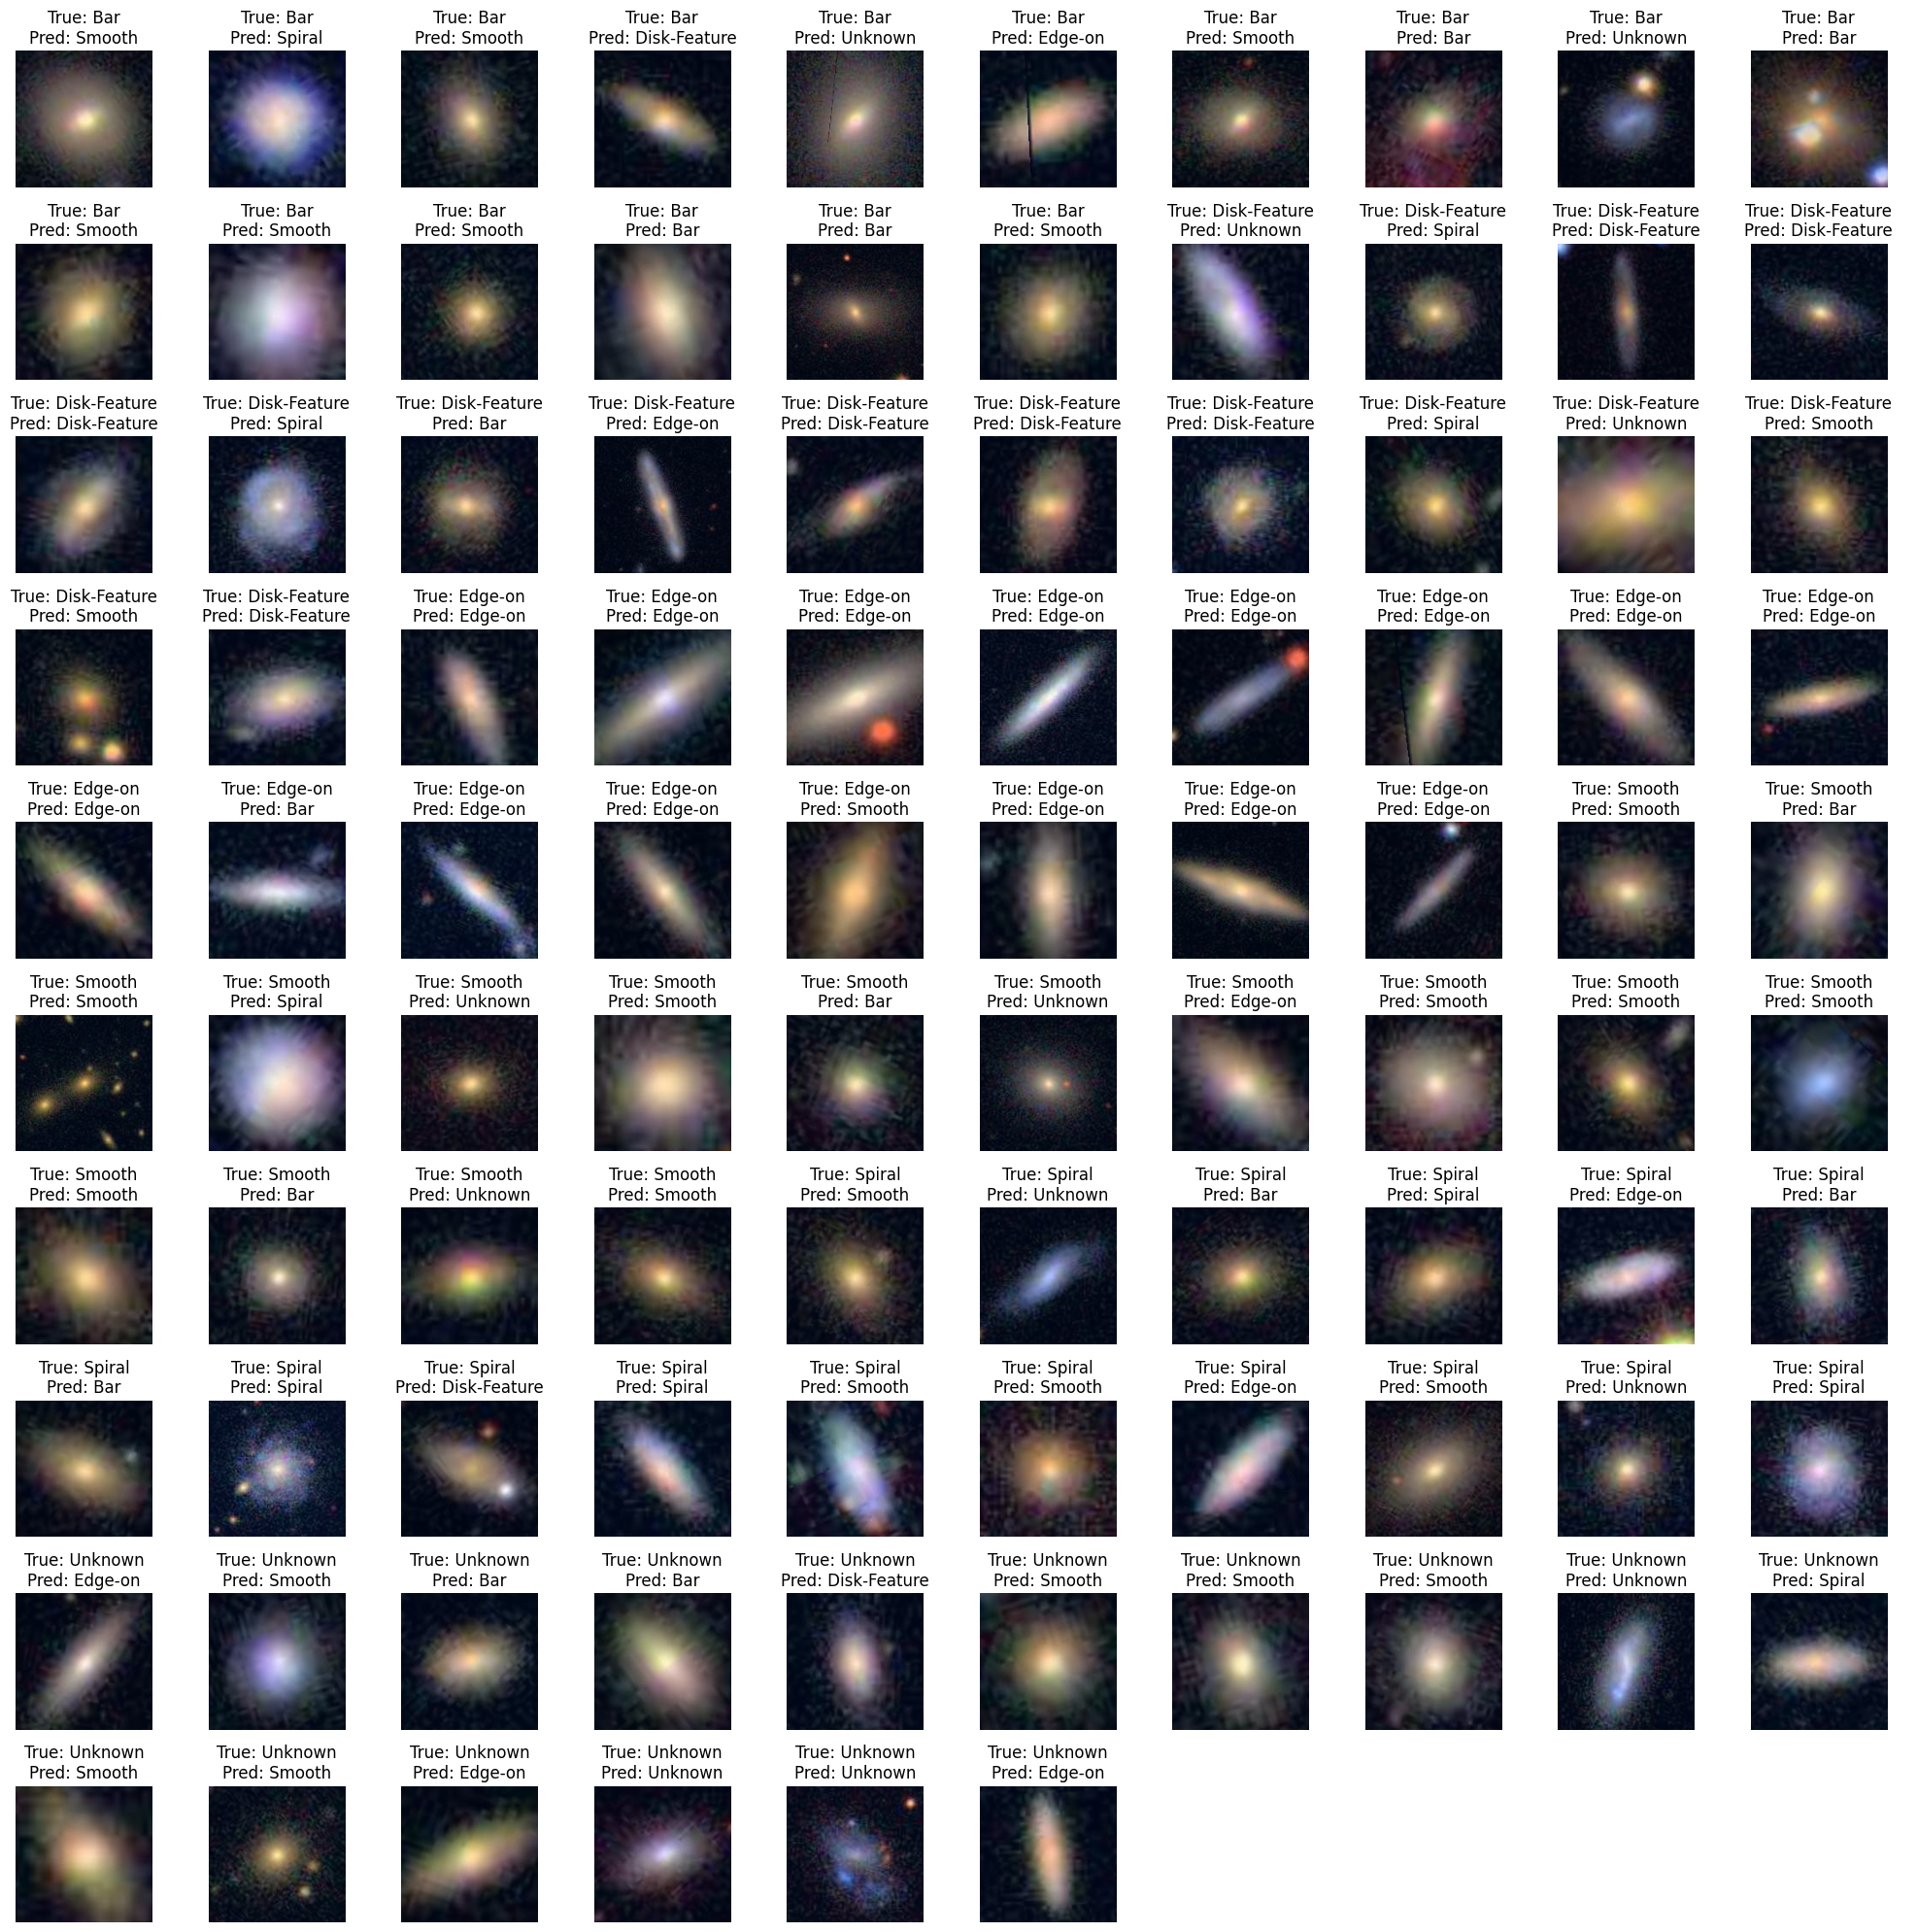

In [ ]:
num_images = 100
cols=10
rows=10
figsize=(20, 20)
# Example Usage
predict_on_random_images(model, test_loader, class_to_idx_test, device, num_images, rows, cols, figsize)


In [ ]:
# prompt: function to count true prediction for random images in all classes

def count_true_predictions(model, test_loader, class_to_idx, device):
    model.eval()
    idx_to_class = {v: k for k, v in class_to_idx.items()}
    true_predictions_per_class = defaultdict(int)
    total_images_per_class = defaultdict(int)

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            for i in range(len(images)):
                true_class = idx_to_class[labels[i].item()]
                predicted_class = idx_to_class[preds[i].item()]
                total_images_per_class[true_class] += 1
                if true_class == predicted_class:
                    true_predictions_per_class[true_class] += 1

    return true_predictions_per_class, total_images_per_class
# Example usage:
true_predictions, total_images = count_true_predictions(model, test_loader, class_to_idx_test, device)
print(true_predictions)
total_images

defaultdict(<class 'int'>, {'Bar': 303, 'Disk-Feature': 388, 'Edge-on': 611, 'Smooth': 442, 'Spiral': 205, 'Unknown': 161})


defaultdict(int,
            {'Bar': 675,
             'Disk-Feature': 675,
             'Edge-on': 675,
             'Smooth': 675,
             'Spiral': 675,
             'Unknown': 675})

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: move this /content/galaxy_data to drive

shutil.move('/content/galaxy_data', '/content/drive/My Drive/galaxy_data')

'/content/drive/My Drive/galaxy_data'

In [ ]:
shutil.move('/content/best_ResNet50_model.pth', '/content/drive/My Drive/best_ResNet50_model.pth')

'/content/drive/My Drive/best_ResNet50_model.pth'